In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
quantum_linear = np.load('quantum_2order_linear_1traj_100step.npz')['results'].squeeze()
quantum_nonlinear = np.load('quantum_2order_nonlinear_1traj_100step.npz')['results'].squeeze()
classical_linear = np.load('classical_2order_linear_1traj_100step_False.npz')['qsd_result']
classical_nonlinear = np.load('classical_2order_nonlinear_1traj_100step_False.npz')['qsd_result']

print(quantum_linear.shape)
print(quantum_nonlinear.shape)
print(classical_linear.shape)
print(classical_nonlinear.shape)

(101, 3)
(101, 3)
(101, 3)
(101, 3)


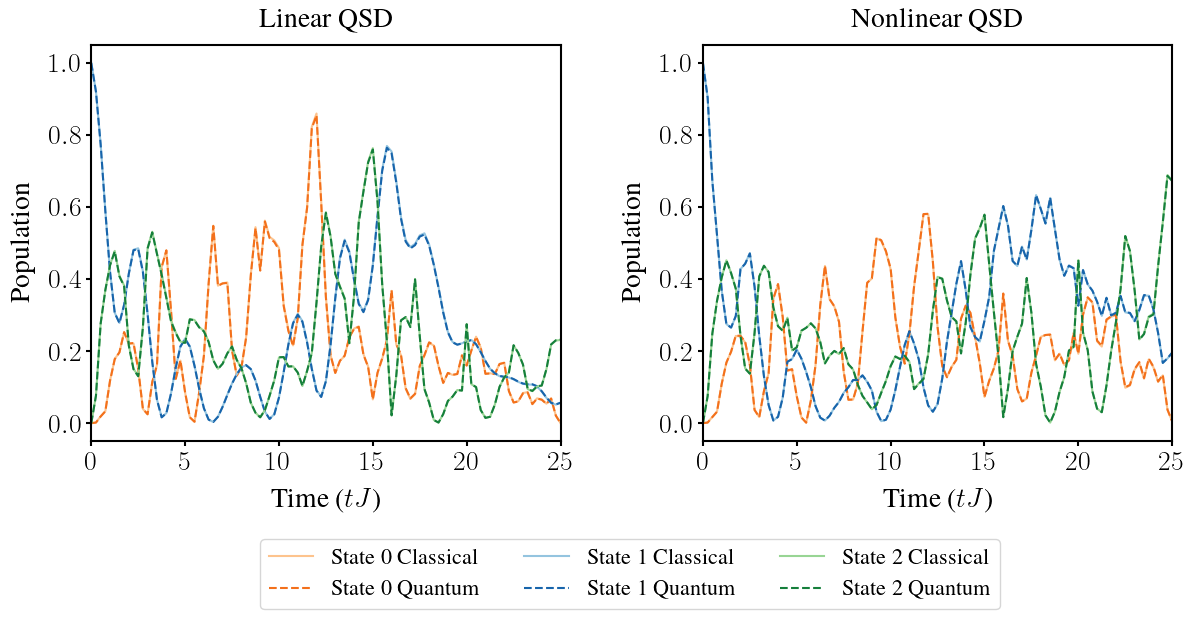

In [3]:
spines_linewidth = 1.5
linewidth = 1.5
font_size = 20
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times New Roman",
    "font.size": font_size
})
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
plt.rcParams['text.latex.preamble'] = r'\usepackage{times}'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.tight_layout(w_pad=3)
ax1.set_xlabel('Time ($tJ$)', fontsize=font_size, labelpad=10)
ax1.set_ylabel('Population', fontsize=font_size, labelpad=10)
ax2.set_xlabel('Time ($tJ$)', fontsize=font_size, labelpad=10)
ax2.set_ylabel('Population', fontsize=font_size, labelpad=10)
T = 25
step_num = 100
tlist = np.linspace(0.0, T, step_num+1)
ax1.set_xlim([0,T])
ax2.set_xlim([0,T])

ax1.spines['top'].set_linewidth(spines_linewidth)
ax1.spines['bottom'].set_linewidth(spines_linewidth)
ax1.spines['left'].set_linewidth(spines_linewidth)
ax1.spines['right'].set_linewidth(spines_linewidth)
ax2.spines['top'].set_linewidth(spines_linewidth)
ax2.spines['bottom'].set_linewidth(spines_linewidth)
ax2.spines['left'].set_linewidth(spines_linewidth)
ax2.spines['right'].set_linewidth(spines_linewidth)
ax1.tick_params(width=spines_linewidth, labelsize=font_size)
ax2.tick_params(width=spines_linewidth, labelsize=font_size)
ax1.tick_params(labelsize=font_size)
ax2.tick_params(labelsize=font_size)

colormap_blue = plt.get_cmap('Blues')
colormap_orange = plt.get_cmap('Oranges')
colormap_green = plt.get_cmap('Greens')

classical_color = 0.4
quantum_color = 0.8

ax1.plot(tlist, classical_linear[:,0], label = 'State 0 Classical', color=colormap_orange(classical_color-0.1))
ax1.plot(tlist, quantum_linear[:,0], label = 'State 0 Quantum', linestyle='--', color=colormap_orange(quantum_color-0.2))
ax1.plot(tlist, classical_linear[:,1], label = 'State 1 Classical', color=colormap_blue(classical_color))
ax1.plot(tlist, quantum_linear[:,1], label = 'State 1 Quantum', linestyle='--', color=colormap_blue(quantum_color))
ax1.plot(tlist, classical_linear[:,2], label = 'State 2 Classical', color=colormap_green(classical_color))
ax1.plot(tlist, quantum_linear[:,2], label = 'State 2 Quantum', linestyle='--', color=colormap_green(quantum_color))

ax2.plot(tlist, classical_nonlinear[:,0], label = 'State 0 Classical', color=colormap_orange(classical_color-0.1))
ax2.plot(tlist, classical_nonlinear[:,1], label = 'State 1 Classical', color=colormap_blue(classical_color))
ax2.plot(tlist, classical_nonlinear[:,2], label = 'State 2 Classical', color=colormap_green(classical_color))
ax2.plot(tlist, quantum_nonlinear[:,0], label = 'State 0 Quantum', linestyle='--', color=colormap_orange(quantum_color-0.2))
ax2.plot(tlist, quantum_nonlinear[:,1], label = 'State 1 Quantum', linestyle='--', color=colormap_blue(quantum_color))
ax2.plot(tlist, quantum_nonlinear[:,2], label = 'State 2 Quantum', linestyle='--', color=colormap_green(quantum_color))

ax1.set_title('Linear QSD', fontsize=font_size, y=1.02)
ax2.set_title('Nonlinear QSD', fontsize=font_size, y=1.02)

ax1.legend(fontsize=font_size-4, ncol=3, bbox_to_anchor=(1.96, -0.22))

plt.savefig('TFIM_CQ_Comp.pdf', dpi=600, bbox_inches='tight')